# FUNCTIONS

### *Importing Libraries*

In [318]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

## Fourier Transform 
$ \tilde{x}[n] = \sum \limits _{k=0} ^{N-1} a_k  e^{jk \frac{2\pi}{N} n}$\
$ a_k = \frac{1}{N} \sum \limits _{n=-N_1} ^{N_2} \tilde{x}[n] e^{-jk \frac{2\pi}{N} n}$
$ = \frac{1}{N} \sum \limits _{n=-\infty} ^{\infty} x[n] e^{jk \frac{2\pi}{N} n}$\
$ X(e^{jkw_0}) = a_k N$

In [319]:
def fourier(y,N):
    Y_1=np.zeros(N)
    Y=Y_1.astype(complex)

    for i in range(N):
        for k in range(N):
            Y[i]+=y[k]*np.exp(-1*(0+1j)*math.pi*2/N*i*k)
    return Y

## Fourier Transform for Time Delayed Input
$\mathcal{F} (x[n-n_0]) = X(e^{jkw_0})e^{-jkw_0n_0}$ where $\mathcal{F}$ represents Fourier Transform

In [320]:
def fourier_translate(y,N,t):
    Y_1=np.zeros(N )
    Y=Y_1.astype(complex)

    for i in range(N):
        for k in range(N):
            Y[i]=Y[i]+y[k]*np.exp(-1*(0+1j)*math.pi*2/N*(i)*(k-t))
    return Y

## Inverse Fourier Transform
$ \tilde{x}[n] = \sum \limits _{k=0} ^{N-1} \frac{1}{N} X(e^{jkw_0}) e^{jkw_0 n}$
$ = \frac{1}{2\pi} \sum \limits _{k=0} ^{N-1} X(e^{jkw_0}) e^{jkw_0 n} w_0$

In [321]:
def inv_fourier(Y,n):
        y_1=np.zeros(n)
        y=y_1.astype(complex)
        
        for i in range(n):
            for k in range(n):
                y[i]+=Y[k]*(1/n)*np.exp((0+1j)*math.pi*2/n*k*i)
        return y

## Periodic extention and Retrieval
$ \tilde{x}[n] $ is the periodic extension of $ x[n] $ of length $ N $ and it is found by making other values of $ n $ zero 
![x](./X.png)\
![x](./X_T.png)

Converts $x[n]$ to $\tilde{x}[n]$

In [322]:
def periodic_extension(y,N): 
    y_in_1=np.zeros(N )
    y_in =y_in_1.astype(complex)

    for i in range(N):
        if i<y.size-1:
            y_in[i]+=y[i]
    return y_in

Converts $\tilde{x}[n]$ to $x[n]$

In [323]:
def retrieve(y,n):
    y_out = np.zeros(n)
    for i in range(n):
        y_out[i]=y[i]
    return y_out

## Low Pass Filter
Allows frequency less than $l$ to pass

In [324]:
def Filter1(Y,l):
    Y_filtered_1=np.zeros(N)
    Y_filtered=Y_filtered_1.astype(complex)
    for i in range(l):
        Y_filtered[i]=Y[i]
    y_fil_re=inv_fourier(Y_filtered,N)
    if(i==0):
        return y_fil_re
    return Y_filtered

## Amplitude - Based Supression Filter
Supresses frequencies whose amplitude in signal's fourier transform is less than $threshold$

In [325]:
def Filter2(Y,threshold):
    Y_filtered_1=np.zeros(N)
    Y_filtered=Y_filtered_1.astype(complex)
    for i in range(N):
        if(abs(Y[i])<threshold):
            Y_filtered[i]=0
        else:
            Y_filtered[i]=Y[i]-threshold
    return Y_filtered

## Average Filter 
Averages $m$ neighbouring points for each data point in a signal

In [326]:
def Filter3(Y,m):
    Y_filtered_1=np.zeros(N)
    Y_filtered=Y_filtered_1.astype(complex)
    for i in range(N):
        if i<(m-1)//2 :
           for j in range(-i,(m+1)//2):
            Y_filtered[i]+=Y[j+i]*(1/m)
        elif i>N-((m+1)//2):
            for j in range(-(m-1)//2,N-i):
                Y_filtered[i]+=Y[j+i]*(1/m)   
        else:
            for j in range(-(m-1)//2,(m+1)//2):
                Y_filtered[i]+=Y[j+i]*(1/m)
    return Y_filtered

## Deblurring Functions
* Generates fourier transform of deblurring signal $h[n] = \frac{1}{16}[1,4,6,4,1]$

In [327]:
def deblur(N):
    h1=np.array([1, 4, 6, 4, 1] , dtype='complex')
    h1=h1/16
    h1
    h1_in_1=np.zeros(N )
    h1_in =h1_in_1.astype(complex)
    for i in range(N):
        if i<5:
            h1_in[i]+=h1[i]
    H1 = fourier_translate(h1_in , N,2)
    return H1

* Finds the fourier transform of deblurred signal

In [328]:
def deblurit(Y,N,H1):
    Y_deblur_1=np.zeros(N)
    Y_deblur=Y_deblur_1.astype(complex)
    tolerance=0.0001
    for i in range(N):
        if(abs(H1[i])>tolerance ):
            Y_deblur[i]=Y[i]/H1[i]
        else :
            Y_deblur[i]=Y[i]/tolerance
    #plt.plot(Y_deblur)
    return Y_deblur

## Root Mean Squared Error

In [329]:
def RMSE(x,y):
    error=0
    for i in range(x.size):
        error+=(y[i]-x[i])**2
    print(math.sqrt(error/(x.size)))
    return (math.sqrt(error/(x.size)))

# MAIN CODE
## Data Pre - processing

## *Importing Data*

In [330]:
df = pd.read_csv("data.csv")
y=np.array(df["y[n]"])
x=np.array(df["x[n]"])
df

,x[n],y[n]
0,35.4312,33.3735
1,35.1511,34.3744
2,34.8284,35.7514
3,34.4656,35.5869
4,34.0656,36.0826
...,...,...
188,31.4198,33.5967
189,31.7396,31.7135
190,32.0228,32.6819
191,32.2673,30.9260


## *Defining Hyperparameters*

In [331]:
N=1000   #For periodic extension, fundamental period of n
l=50     #For low pass filter, l is the cutoff frequency
threshold=67     #Threshold for amplitude based filtering

# Low Pass Filtering
## *Task 1*

![x](./Task_1_LP.png)

11.182317196512546


<ipython-input-323-8a16483be7f3>:4: ComplexWarning: Casting complex values to real discards the imaginary part
  y_out[i]=y[i]


11.182317196512546

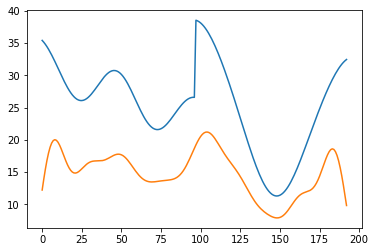

In [332]:
y_periodic_extension=periodic_extension(y,N)
Y_periodic_extension=fourier(y_periodic_extension,N)
Y_denoise1=Filter1(Y_periodic_extension,l)
H=deblur(N)
Y_deblur1=deblurit(Y_denoise1,N,H)
y_deblur1=inv_fourier(Y_deblur1,N)
y_out=retrieve(y_deblur1,y.size)

plt.plot(x)
plt.plot(y_out)
RMSE(x,y_out)

## *Task 2*

![x](./Task_2_LP.png)

11.182317196512546


<ipython-input-323-8a16483be7f3>:4: ComplexWarning: Casting complex values to real discards the imaginary part
  y_out[i]=y[i]


11.182317196512546

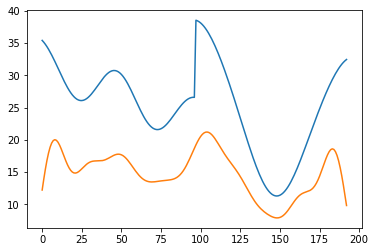

In [333]:
H=deblur(N)
Y_deblur2=deblurit(Y_periodic_extension,N,H)
Y_denoise2=Filter1(Y_deblur2,l)
y_denoise2=inv_fourier(Y_denoise2,N)
y_out2=retrieve(y_denoise2,y.size)

plt.plot(x)
plt.plot(y_out2)
RMSE(x,y_out2)

# Amplitude Based Filtering
## *Task 1*

![x](./Task_1_AB.png)

2.9484298657619705


<ipython-input-323-8a16483be7f3>:4: ComplexWarning: Casting complex values to real discards the imaginary part
  y_out[i]=y[i]


2.9484298657619705

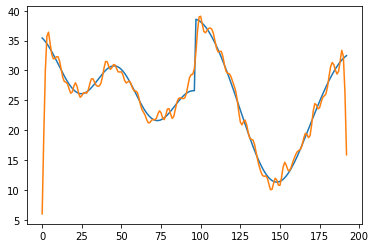

In [334]:
y_periodic_extension=periodic_extension(y,N)
Y_periodic_extension=fourier(y_periodic_extension,N)
Y_denoise3=Filter2(Y_periodic_extension,threshold)
H=deblur(N)
Y_deblur3=deblurit(Y_denoise3,N,H)
y_deblur3=inv_fourier(Y_deblur3,N)
y_out3=retrieve(y_deblur3,y.size)

plt.plot(x)
plt.plot(y_out3)
RMSE(x,y_out3)

## *Task 2*

![x](./Task_2_AB.png)

4486.075046869943


<ipython-input-323-8a16483be7f3>:4: ComplexWarning: Casting complex values to real discards the imaginary part
  y_out[i]=y[i]


4486.075046869943

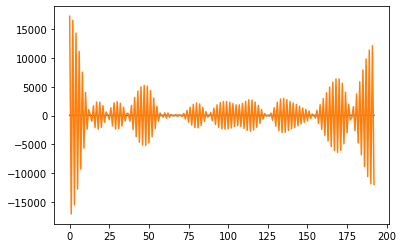

In [335]:
H=deblur(N)
Y_deblur4=deblurit(Y_periodic_extension,N,H)
Y_denoise4=Filter2(Y_deblur4,threshold)
y_denoise4=inv_fourier(Y_denoise4,N)
y_out4=retrieve(y_denoise4,y.size)

plt.plot(x)
plt.plot(y_out4)
RMSE(x,y_out4)

# Average Filtering
## *Task 1*

![x](./Task_1_AF.png)

972.3896948090614


<ipython-input-323-8a16483be7f3>:4: ComplexWarning: Casting complex values to real discards the imaginary part
  y_out[i]=y[i]


972.3896948090614

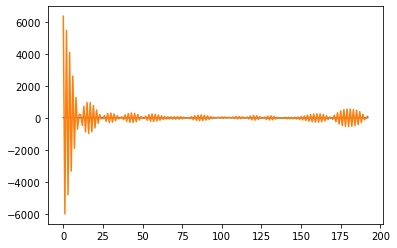

In [336]:
y_denoise5=Filter3(y_periodic_extension,10)
Y_denoise5=fourier(y_denoise5,N)
H=deblur(N)
Y_deblur5=deblurit(Y_denoise5,N,H)
y_deblur5=inv_fourier(Y_deblur5,N)
y_out5=retrieve(y_deblur5,y.size)

plt.plot(x)
plt.plot(y_out5)
RMSE(x,y_out5)

## *Task 2*

![x](./Task_2_AF.png)

289.2348457165835


<ipython-input-323-8a16483be7f3>:4: ComplexWarning: Casting complex values to real discards the imaginary part
  y_out[i]=y[i]


289.2348457165835

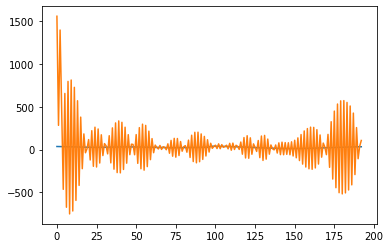

In [337]:
H=deblur(N)
Y_deblur6=deblurit(Y_periodic_extension,N,H)
y_deblur6=inv_fourier(Y_deblur6,N)
y_denoise6=Filter3(y_deblur6,10)
y_out6=retrieve(y_denoise6,y.size)

plt.plot(x)
plt.plot(y_out6)
RMSE(x,y_out6)